*Questão 01 item a*

importando as bibliotecas necessárias

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pegando os dados e separando uma cópia para trabalho

In [7]:
data = np.genfromtxt("./artificial1d.csv", delimiter=",")
#separando os dados de work
work = data.copy()

Normalizando e separando os dados em X (features) e Y (valores esperados)

In [8]:
means = work.mean(0)
stds = np.sqrt((np.sum((work - means)**2,axis=0))/(work.shape[0] - 1))
work = (work - means)/stds #normalização por z-escore

X = work[:,[0]]
Y = work[:,[1]]

Calculando os pesos por OLS, depois calculando os Y previstos e o erro MSE

In [9]:
#Concatenando uma coluna de 1 ao X
X = np.concatenate((np.ones((X.shape[0],1)), X), 1)
#calculando os pesos por OLS
W = np.linalg.solve(X.T@X, X.T@Y)
#calculando os dados previsto e obtendo o MSE
Y_predicted = X @ W
mse = np.mean((Y - Y_predicted)**2)

Desnormalizando os dados e plotando o gráfico com os dados reais, os previstos e o MSE

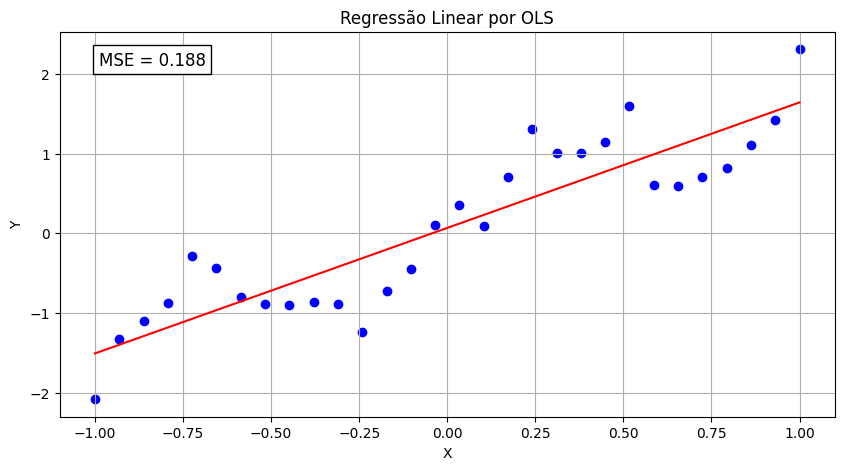

In [10]:
#desnormalizando os dados de treino e as previsões
Y_predicted = Y_predicted*stds[1] + means[1]
Y = Y*stds[1] + means[1]
X = X[:,1]*stds[0] + means[0]

# Plotando
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='Dados de treino')
plt.plot(X, Y_predicted, color='red', label='Regressão linear (OLS)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear por OLS")
plt.text(0.05, 0.95, f"MSE = {mse:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()